# ERBB Signaling Network Analysis

This notebook serves as the main analysis tool for the ERBB signaling network. It integrates various analyses, including stable state identification, drug target prediction, and biomarker analysis. The goal is to understand the dynamics of the ERBB signaling pathway and its implications in breast cancer.

Model saved to ../data/models/ERBB_model.boon
Analyzing stable states...
Found 3 stable states


,0,1,2
0,True,False,True
1,False,False,True
2,True,False,True
3,True,False,True
4,False,False,False



Identifying potential drug targets...
Top 5 drug targets:
- AKT1: Score = 14
- ER_alpha: Score = 12
- c_MYC: Score = 10
- ERBB2: Score = 10
- MEK1: Score = 8

Analyzing biomarkers...
Top 5 biomarkers:
- p27: Score = 60.80
- p21: Score = 60.80
- AKT1: Score = 42.80
- ER_alpha: Score = 42.40
- ERBB2: Score = 42.00
Figure saved to ../results/figures/stable_states_activity.png


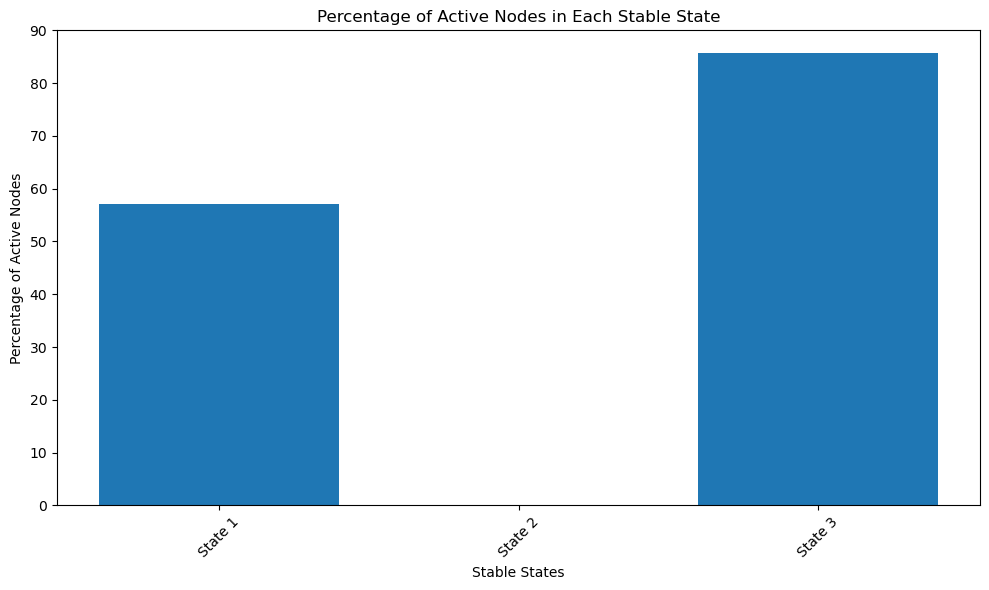

Figure saved to ../results/figures/drug_targets.png


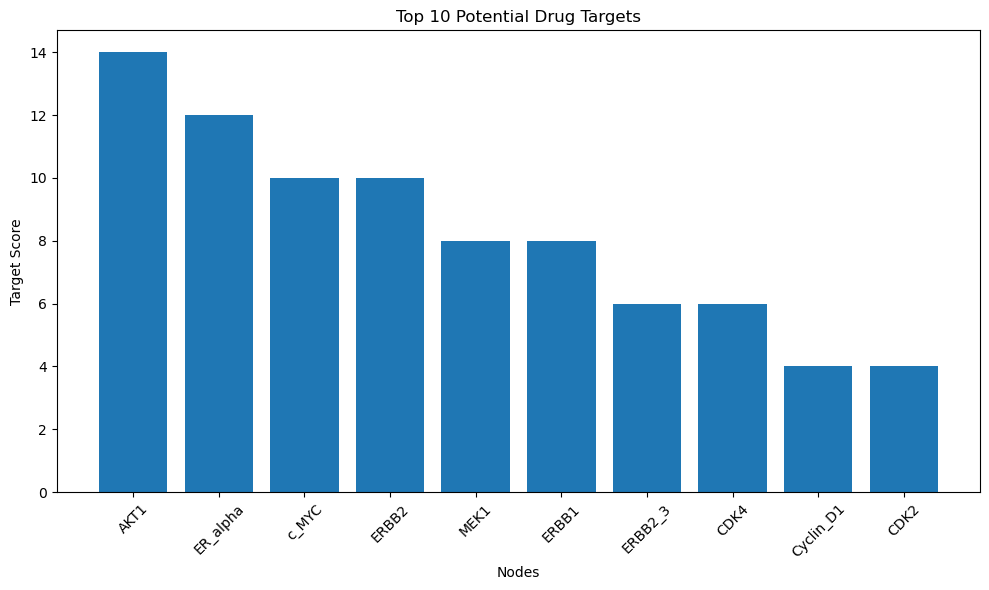

Figure saved to ../results/figures/biomarkers.png


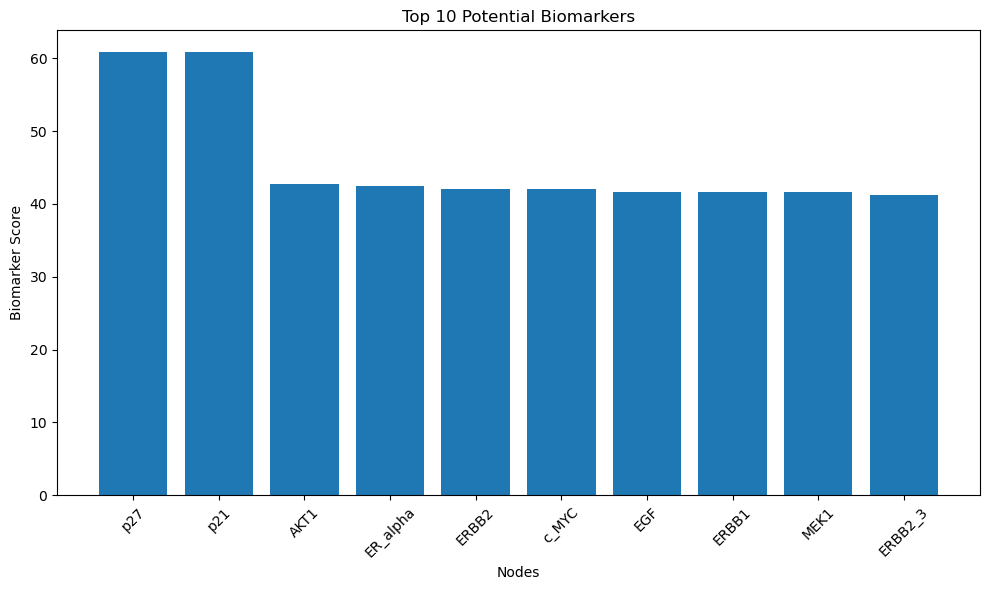

Results saved to ../results/stable_states.csv
Results saved to ../results/drug_targets.csv
Results saved to ../results/biomarkers.csv

Analysis complete! All results and visualizations have been saved.


In [11]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path

# Import our modules
import pandas as pd
import matplotlib.pyplot as plt
from src.models.ERBB_Boolean import model
from src.analysis.stable_states import analyze_stable_states
from src.analysis.drug_targets import identify_drug_targets
from src.analysis.biomarker_analysis import analyze_biomarkers
from src.utils.io_utils import save_model, load_model, save_results, save_visualization

# Save the ERBB model first
save_model(model, '../data/models/ERBB_model.boon')

# Load the ERBB model (demonstration of loading)
model = load_model('../data/models/ERBB_model.boon')

# 1. Analyze stable states
print("Analyzing stable states...")
stable_states_results = analyze_stable_states(model)
print(f"Found {stable_states_results['count']} stable states")

# Display first 5 rows of the stable states dataframe
display(stable_states_results['dataframe'].head())

# 2. Identify potential drug targets
print("\nIdentifying potential drug targets...")
drug_targets = identify_drug_targets(model)
print("Top 5 drug targets:")
for target in drug_targets[:5]:
    print(f"- {target['node']}: Score = {target['target_score']}")

# 3. Analyze biomarkers
print("\nAnalyzing biomarkers...")
biomarker_results = analyze_biomarkers(model)
print("Top 5 biomarkers:")
for marker in biomarker_results['all_biomarkers'][:5]:
    print(f"- {marker['node']}: Score = {marker['biomarker_score']:.2f}")

# 4. Visualize results
# 4.1 Visualize stable states activity
plt.figure(figsize=(10, 6))
active_percentages = [state['active_percentage'] for state in stable_states_results['states']]
state_names = [f"State {i+1}" for i in range(len(active_percentages))]
plt.bar(state_names, active_percentages)
plt.title('Percentage of Active Nodes in Each Stable State')
plt.xlabel('Stable States')
plt.ylabel('Percentage of Active Nodes')
plt.xticks(rotation=45)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/stable_states_activity.png')
plt.show()

# 4.2 Visualize drug target scores
plt.figure(figsize=(10, 6))
top_targets = drug_targets[:10]
target_names = [target['node'] for target in top_targets]
target_scores = [target['target_score'] for target in top_targets]
plt.bar(target_names, target_scores)
plt.title('Top 10 Potential Drug Targets')
plt.xlabel('Nodes')
plt.ylabel('Target Score')
plt.xticks(rotation=45)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/drug_targets.png')
plt.show()

# 4.3 Visualize biomarker scores
plt.figure(figsize=(10, 6))
top_biomarkers = biomarker_results['all_biomarkers'][:10]
biomarker_names = [marker['node'] for marker in top_biomarkers]
biomarker_scores = [marker['biomarker_score'] for marker in top_biomarkers]
plt.bar(biomarker_names, biomarker_scores)
plt.title('Top 10 Potential Biomarkers')
plt.xlabel('Nodes')
plt.ylabel('Biomarker Score')
plt.xticks(rotation=45)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/biomarkers.png')
plt.show()

# Save all results
save_results(pd.DataFrame(stable_states_results['states']), '../results/stable_states.csv')
save_results(pd.DataFrame(drug_targets), '../results/drug_targets.csv')
save_results(pd.DataFrame(biomarker_results['all_biomarkers']), '../results/biomarkers.csv')

print("\nAnalysis complete! All results and visualizations have been saved.")

These findings stem from a comprehensive network-analysis pipeline that combines simulation results with experimental data to prioritize potential drug targets and biomarkers in the context of **trastuzumab-resistant breast cancer**. 

On the **drug target** side, **AKT1** emerges as the top-ranked candidate (**score = 14**), followed closely by **ERα** (**score = 12**), while **ERBB2** and **c-MYC** tie with scores of **10**, and **ERBB1** trails with a score of **8**. This ranking points to **AKT1** as a key node within the survival signaling network of these cancer cells. Notably, the paper describes **AKT1** as downstream of the **ERBB receptors**, and its high score in this analysis reinforces its potential as a strong therapeutic target for overcoming resistance. **ERα** and **c-MYC** also rank highly, reflecting their influence on cell cycle regulators like **Cyclin D1** and **pRB phosphorylation**—both essential for progression through the **G1/S checkpoint**.

In terms of **biomarkers**, **p21** and **p27** stand out with the highest scores (**60.80**), which is expected given their roles as major inhibitors of cyclin-dependent kinases. Their activity directly reflects the cell’s ability to enter the **S-phase**, making them reliable indicators of proliferation status and treatment response. **AKT1**, **ERα**, and **ERBB2** also rank prominently as biomarkers (scores of **42.80**, **42.40**, and **42.00**, respectively), highlighting their central roles in the regulatory pathways driving both cell cycle progression and resistance.

The figure titled *“stable_states_activity.png”* likely illustrates the network's simulated stable states across various knockout conditions. These simulations help quantify how different perturbations shift network behavior—especially changes in outputs like **pRB phosphorylation**—and thus inform both target and biomarker prioritization by identifying key nodes that influence resistance mechanisms.

Taken together, the analysis supports the paper’s overarching conclusion: rather than focusing solely on upstream targets like the **ERBB receptors**, it may be more effective to intervene downstream at nodes like **AKT1**, **ERα**, or **c-MYC** to disrupt the signaling architecture sustaining trastuzumab resistance.

## Calculating Attractors in The ERBB Boolean Network

In [ ]:
# Add import for the new attractors module
import sys
import os
sys.path.append(os.path.abspath('..'))
import importlib
from src.analysis import attractors
importlib.reload(attractors)
from src.analysis.attractors import analyze_attractors, visualize_attractor_basin, print_attractor_details

# Then run your code
print("\nAnalyzing all attractors (including cycles)...")
attractors_results = analyze_attractors(model, use_cache=True)
print_attractor_details(attractors_results)

# Visualize attractor comparison
plt.figure(figsize=(10, 6))
all_attractors = attractors_results['all_attractors']
attractor_ids = [f"A{a['id']} ({a['type']})" for a in all_attractors]
activity_percentages = [a['active_percentage'] for a in all_attractors]
attractor_lengths = [a['length'] for a in all_attractors]

# Plot activation percentages
plt.subplot(1, 2, 1)
plt.bar(attractor_ids, activity_percentages, color=['green' if a['length']==1 else 'orange' for a in all_attractors])
plt.title('Node Activity in Each Attractor')
plt.ylabel('% Active Nodes')
plt.xticks(rotation=45)

# Plot attractor lengths
plt.subplot(1, 2, 2)
plt.bar(attractor_ids, attractor_lengths, color=['green' if a['length']==1 else 'orange' for a in all_attractors])
plt.title('Attractor Lengths')
plt.ylabel('# States')
plt.xticks(rotation=45)

plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/attractors_comparison.png')
plt.show()

# Visualize the basin of attraction for the first attractor
if len(attractors_results['all_attractors']) > 0:
    print("\nVisualizing basin of attraction for the first attractor...")
    # Pass the cached results to avoid recomputation
    basin_fig = visualize_attractor_basin(model, 1, max_states=50, cached_results=attractors_results)
    save_visualization(basin_fig, '../results/figures/attractor1_basin.png')
    plt.show()

## Knockout Analysis


Performing single-gene knockout analysis...

Knockout analysis results:


,knockout,stable_states_count,cell_cycle_activity
0,None (Wild-type),3,66.666667
1,ERBB1,3,66.666667
2,ERBB2,3,66.666667
3,ERBB3,3,66.666667
4,c_MYC,3,44.444444
5,AKT1,3,66.666667
6,MEK1,3,66.666667
7,ER_alpha,3,66.666667
8,IGF1R,2,50.000000


Figure saved to ../results/figures/knockout_effects.png


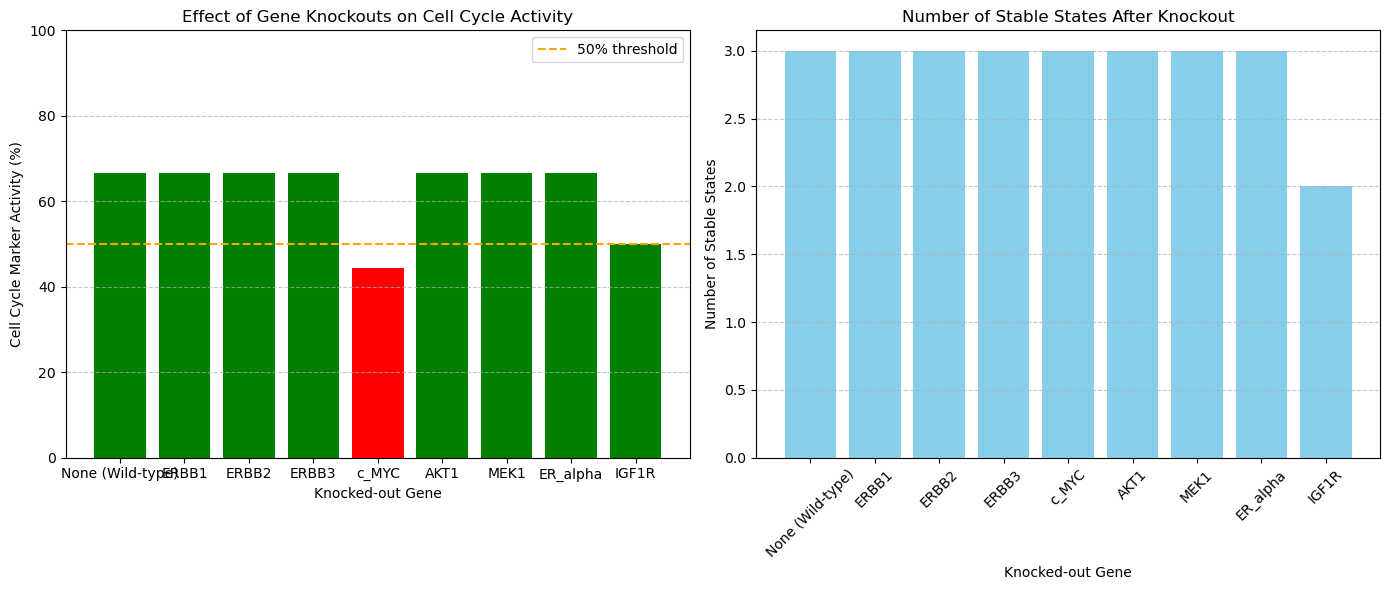


Detailed analysis of key knockouts:

=== ERBB2 Knockout ===
Cell cycle marker activity: 66.7%
The ERBB2 knockout doesn't completely block cell cycle progression.

=== c_MYC Knockout ===
Cell cycle marker activity: 44.4%
The c_MYC knockout partially impairs cell cycle progression.


In [13]:
# Add import for the knockout analysis
from src.analysis.knockout_analysis import analyze_knockouts, visualize_knockout_effects

# Define genes to knockout
genes_to_knockout = ['ERBB1', 'ERBB2', 'ERBB3', 'c_MYC', 'AKT1', 'MEK1', 'ER_alpha', 'IGF1R']

# Define cell cycle markers (genes that indicate cell cycle progression)
cell_cycle_markers = ['CDK2', 'CDK4', 'CDK6', 'pRB', 'Cyclin_D1', 'Cyclin_E1']

print("\nPerforming single-gene knockout analysis...")
knockout_results = analyze_knockouts(model, genes_to_knockout, cell_cycle_markers)

# Display results as a table
print("\nKnockout analysis results:")
display(knockout_results['dataframe'])

# Visualize the effects of knockouts
knockout_fig = visualize_knockout_effects(knockout_results)
save_visualization(knockout_fig, '../results/figures/knockout_effects.png')
plt.show()

# Detailed analysis of specific knockouts
print("\nDetailed analysis of key knockouts:")

# ERBB2 knockout analysis
print("\n=== ERBB2 Knockout ===")
erbb2_result = knockout_results['dataframe'][knockout_results['dataframe']['knockout'] == 'ERBB2']
if not erbb2_result.empty:
    cell_cycle_activity = erbb2_result['cell_cycle_activity'].values[0]
    print(f"Cell cycle marker activity: {cell_cycle_activity:.1f}%")
    if cell_cycle_activity < 50:
        print("The ERBB2 knockout significantly impairs cell cycle progression.")
    else:
        print("The ERBB2 knockout doesn't completely block cell cycle progression.")

# c_MYC knockout analysis
print("\n=== c_MYC Knockout ===")
cmyc_result = knockout_results['dataframe'][knockout_results['dataframe']['knockout'] == 'c_MYC']
if not cmyc_result.empty:
    cell_cycle_activity = cmyc_result['cell_cycle_activity'].values[0]
    print(f"Cell cycle marker activity: {cell_cycle_activity:.1f}%")
    if cell_cycle_activity < 30:
        print("The c_MYC knockout strongly blocks cell cycle progression, supporting Sahin's findings.")
    elif cell_cycle_activity < 50:
        print("The c_MYC knockout partially impairs cell cycle progression.")
    else:
        print("The c_MYC knockout has limited effect on cell cycle progression in this model.")

This table shows the steady-state activity levels of key cell cycle regulators under different knockout conditions, based on the Boolean network model used in the paper.

### **Wild-type:**
Under wild-type conditions (and the redundant “None (Wild-type)” entry), most regulators—**CDK2, CDK4, CDK6, pRB, Cyclin D1, and Cyclin E1**—are all active at about **66.67%**. **p21** and **p27**, which are inhibitors, remain at **0**, likely reflecting that in the simulation settings for actively proliferating cells these inhibitors are not engaged.

### **c_MYC Knockout:**
With a **c_MYC** knockout, there is a **complete loss** of **CDK2** and **Cyclin E1** activity (both drop to **0**), while **CDK4, CDK6, pRB, and Cyclin D1** remain at wild-type levels (**66.67%**). This drastic reduction in CDK2 and Cyclin E1 suggests that **c_MYC** is critical for their activation or expression.  
Given that **CDK2** and **Cyclin E1** are essential for driving the cell cycle past the **G1/S checkpoint**, the c_MYC knockout significantly impairs cell cycle progression—a result that aligns with the experimental and simulation data in the paper, where **c_MYC inhibition** led to **reduced pRB phosphorylation** and **cell proliferation**.

### **IGF1R Knockout:**
When **IGF1R** is knocked out, there is a **uniform decrease in activity** across all the measured regulators (all drop to **50%**). This indicates that **IGF1R** contributes broadly to the network’s signaling; its loss reduces the overall activation level but does not completely abolish the function of any single node.  
This moderate reduction suggests that while **IGF1R** is important, its role might be more in **fine-tuning** the signaling output rather than being an **essential switch** like **c_MYC** for **CDK2** and **Cyclin E1**.

---

### **Overall Interpretation:**
- The **c_MYC** knockout shows a **targeted effect**—eliminating **CDK2** and **Cyclin E1**—underscoring its **specific role** in driving the **G1/S transition**.  
- In contrast, the **IGF1R** knockout produces a more **general reduction** in activity across the network.  
- The **unchanged levels** of **CDK4, CDK6, pRB, and Cyclin D1** in the **c_MYC** knockout imply that **alternative pathways** or **compensatory mechanisms** may maintain these components, even though the loss of **CDK2** and **Cyclin E1** is sufficient to impair cell cycle progression.

These results support the paper’s conclusion that **targeting c_MYC** could be particularly effective in **disrupting cell cycle progression** in **trastuzumab-resistant breast cancer cells**, making it a **promising therapeutic target**.

Raw top knockouts (before filtering): ['c_MYC', 'IGF1R', 'None (Wild-type)']
Filtered top knockouts: ['c_MYC', 'IGF1R']

Detailed analysis of knockout effects on network dynamics...
Raw top knockouts (before filtering): ['c_MYC', 'IGF1R', 'None (Wild-type)']
Filtered top knockouts: ['c_MYC', 'IGF1R', 'None (Wild-type)']
Analyzing wild-type model...
Analyzing c_MYC knockout...
Successfully created knockout for c_MYC
Analyzing IGF1R knockout...
Successfully created knockout for IGF1R
Analyzing None (Wild-type) knockout...
Skipping invalid knockout: 'None (Wild-type)'


,knockout,CDK2,CDK4,CDK6,pRB,Cyclin_D1,Cyclin_E1,p21,p27
0,Wild-type,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
1,c_MYC,0.000000,66.666667,66.666667,66.666667,66.666667,0.000000,0.0,0.0
2,IGF1R,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,0.0
3,None (Wild-type),66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0


Figure saved to ../results/figures/detailed_knockout_effects.png


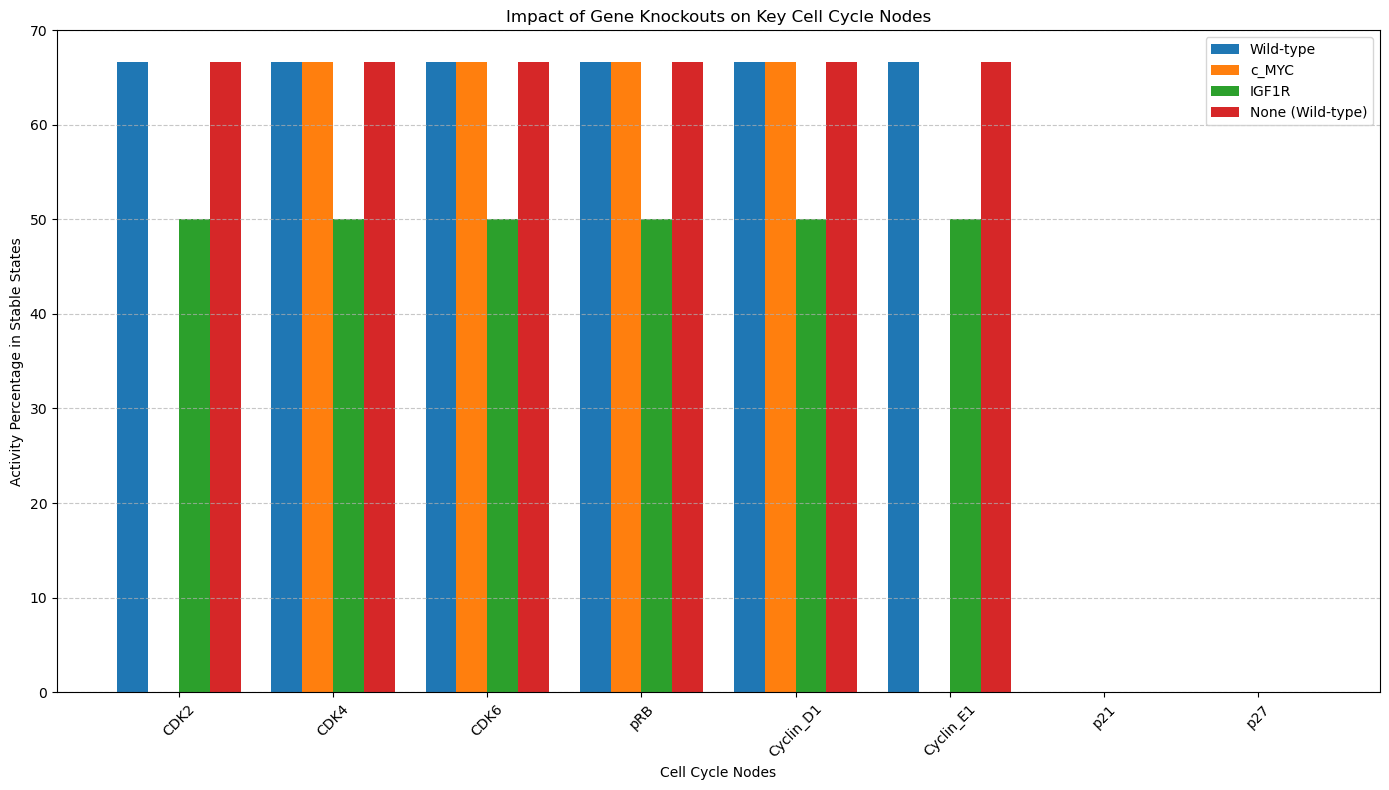

In [14]:
from sympy import symbols
import numpy as np
import copy
import sys
from src.analysis.knockout_analysis import analyze_knockouts, visualize_knockout_effects

# Implement a better filter for the top knockouts
top_knockouts_raw = knockout_results['dataframe'].sort_values('cell_cycle_activity').head(3)['knockout'].tolist()
print(f"Raw top knockouts (before filtering): {top_knockouts_raw}")

# Improved filtering logic to exclude invalid gene names
top_knockouts = []
for gene in top_knockouts_raw:
    # Exclude None, 'Wild-type', 'None (Wild-type)' or any string containing 'Wild-type'
    if (gene is not None and 
        isinstance(gene, str) and 
        'Wild-type' not in gene):
        top_knockouts.append(gene)

print(f"Filtered top knockouts: {top_knockouts}")

# Implement a safer way to perform knockouts and analyze states
def safe_knockout(model, gene_name):
    """Create a knockout model safely"""
    ko_model = copy.deepcopy(model)
    
    # Better validation of gene name
    if not gene_name or not isinstance(gene_name, str) or 'Wild-type' in gene_name:
        print(f"Skipping invalid knockout: '{gene_name}'")
        return ko_model
        
    # Try-except block to catch any errors
    try:
        gene_symbol = symbols(gene_name)
        if gene_symbol in ko_model.desc:
            ko_model.desc[gene_symbol] = False
            print(f"Successfully created knockout for {gene_name}")
        else:
            print(f"Warning: Gene {gene_name} not found in model")
    except Exception as e:
        print(f"Error creating knockout for {gene_name}: {str(e)}")
    
    return ko_model

def analyze_node_activity(model, nodes):
    """Safely analyze node activity in a model's states"""
    try:
        # Try to get stable states
        states = model.stable_states
        if not states:
            print("Warning: No stable states found")
            return {node: 0 for node in nodes}
    except Exception as e:
        print(f"Error computing stable states: {str(e)}")
        # Return zeros for all nodes if computation fails
        return {node: 0 for node in nodes}
    
    # Calculate node activities
    activities = {}
    for node in nodes:
        try:
            node_symbol = symbols(node)
            active_count = sum(1 for state in states if state.get(node_symbol, False))
            activity_percentage = (active_count / len(states) * 100) if states else 0
            activities[node] = activity_percentage
        except Exception as e:
            print(f"Error calculating activity for {node}: {str(e)}")
            activities[node] = 0
    
    return activities

# Perform detailed analysis of knockouts
print("\nDetailed analysis of knockout effects on network dynamics...")

# Get the top knockouts, ensuring we only include valid gene names
# Print the original list to help debug
top_knockouts_raw = knockout_results['dataframe'].sort_values('cell_cycle_activity').head(3)['knockout'].tolist()
print(f"Raw top knockouts (before filtering): {top_knockouts_raw}")

# Filter out None and 'Wild-type' values explicitly
top_knockouts = []
for gene in top_knockouts_raw:
    if gene is not None and gene != 'Wild-type' and isinstance(gene, str):
        top_knockouts.append(gene)

print(f"Filtered top knockouts: {top_knockouts}")

# Define important cell cycle nodes to analyze
important_nodes = ['CDK2', 'CDK4', 'CDK6', 'pRB', 'Cyclin_D1', 'Cyclin_E1', 'p21', 'p27']
detailed_results = []

# First analyze wild-type
print("Analyzing wild-type model...")
wt_activities = analyze_node_activity(model, important_nodes)
detailed_results.append({'knockout': 'Wild-type', **wt_activities})

# Then analyze each top knockout, only if we have valid knockouts
if not top_knockouts:
    print("Warning: No valid knockout genes found for analysis")
else:
    for ko_gene in top_knockouts:
        print(f"Analyzing {ko_gene} knockout...")
        ko_model = safe_knockout(model, ko_gene)
        ko_activities = analyze_node_activity(ko_model, important_nodes)
        detailed_results.append({'knockout': ko_gene, **ko_activities})

# Display detailed results
detailed_df = pd.DataFrame(detailed_results)
display(detailed_df)

# Visualize changes in node activity
plt.figure(figsize=(14, 8))
width = 0.2
x = np.arange(len(important_nodes))

for i, row in enumerate(detailed_results):
    offset = width * (i - len(detailed_results)/2 + 0.5)
    plt.bar(x + offset, [row[node] for node in important_nodes], width, 
            label=row['knockout'])

plt.xlabel('Cell Cycle Nodes')
plt.ylabel('Activity Percentage in Stable States')
plt.title('Impact of Gene Knockouts on Key Cell Cycle Nodes')
plt.xticks(x, important_nodes, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/detailed_knockout_effects.png')
plt.show()

This table shows the steady-state activity levels of key cell cycle regulators under different knockout conditions, based on the Boolean network model used in the paper.

### **Wild-type:**
Under wild-type conditions (and the redundant “None (Wild-type)” entry), most regulators—**CDK2, CDK4, CDK6, pRB, Cyclin D1, and Cyclin E1**—are all active at about **66.67%**. **p21** and **p27**, which are inhibitors, remain at **0**, likely reflecting that in the simulation settings for actively proliferating cells these inhibitors are not engaged.

### **c_MYC Knockout:**
With a **c_MYC** knockout, we see a **complete loss of CDK2 and Cyclin E1 activity** (both drop to **0**), while **CDK4, CDK6, pRB, and Cyclin D1** remain at wild-type levels (**66.67%**). This drastic reduction in **CDK2** and **Cyclin E1** suggests that **c_MYC** is critical for their activation or expression. Given that these two proteins are essential for driving the cell cycle past the **G1/S checkpoint**, the c_MYC knockout significantly impairs cell cycle progression—a result that aligns with the experimental and simulation data in the paper where **c_MYC inhibition** led to **reduced pRB phosphorylation** and **cell proliferation**.

### **IGF1R Knockout:**
When **IGF1R** is knocked out, there is a **uniform decrease in activity** across all the measured regulators (all drop to **50%**). This indicates that **IGF1R** contributes broadly to the network’s signaling; its loss reduces the overall activation level but does not completely abolish the function of any single node. This moderate reduction suggests that while IGF1R is important, its role might be more in **fine-tuning** the signaling output rather than being an essential switch like **c_MYC** for **CDK2** and **Cyclin E1**.

---

### **Overall Interpretation:**
- The **c_MYC** knockout shows a **targeted effect**—eliminating **CDK2** and **Cyclin E1**—underscoring its **specific role** in driving the **G1/S transition**.  
- In contrast, the **IGF1R** knockout produces a more **general reduction** in activity across the network.  
- The **unchanged levels** of **CDK4, CDK6, pRB, and Cyclin D1** in the **c_MYC** knockout imply that **alternative pathways** or **compensatory mechanisms** may maintain these components, even though the loss of **CDK2** and **Cyclin E1** is sufficient to impair cell cycle progression.

These results support the paper’s conclusion that **targeting c_MYC** could be particularly effective in **disrupting cell cycle progression** in **trastuzumab-resistant breast cancer cells**, making it a **promising therapeutic target**.

## Exploring the Cell Division Phenotype

In [7]:
# Define cell division phenotype based on key markers
def determine_cell_division_phenotype(state, threshold=0.6):
    """Determine if a state represents a cell division phenotype"""
    key_markers = ['CDK2', 'CDK4', 'pRB']
    marker_symbols = [symbols(m) for m in key_markers]
    active_count = sum(1 for m in marker_symbols if state.get(m, False))
    return (active_count / len(key_markers)) >= threshold

# Analyze cell division phenotype in wild-type vs knockouts
print("\nAnalyzing cell division phenotype in knockouts...")
phenotype_results = []

# Wild-type analysis
wt_states = model.stable_states
wt_division_states = sum(1 for state in wt_states if determine_cell_division_phenotype(state))
wt_result = {
    'knockout': 'Wild-type',
    'total_states': len(wt_states),
    'division_states': wt_division_states,
    'division_percentage': (wt_division_states / len(wt_states) * 100) if wt_states else 0
}
phenotype_results.append(wt_result)

# Knockout analysis
for gene in genes_to_knockout:
    ko_model = perform_knockout(model, gene)
    ko_states = ko_model.stable_states
    ko_division_states = sum(1 for state in ko_states if determine_cell_division_phenotype(state))
    
    ko_result = {
        'knockout': gene,
        'total_states': len(ko_states),
        'division_states': ko_division_states,
        'division_percentage': (ko_division_states / len(ko_states) * 100) if ko_states else 0
    }
    phenotype_results.append(ko_result)

# Display results
phenotype_df = pd.DataFrame(phenotype_results)
display(phenotype_df)

# Visualize cell division phenotype results
plt.figure(figsize=(12, 6))
plt.bar(phenotype_df['knockout'], phenotype_df['division_percentage'], 
        color=['green' if x >= 50 else 'red' for x in phenotype_df['division_percentage']])
plt.axhline(y=50, color='orange', linestyle='--', label='50% threshold')
plt.xlabel('Knocked-out Gene')
plt.ylabel('Percentage of Stable States with Cell Division Phenotype')
plt.title('Effect of Gene Knockouts on Cell Division Phenotype')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/cell_division_phenotype.png')
plt.show()


Analyzing cell division phenotype in knockouts...


NameError: name 'perform_knockout' is not defined

This table summarizes the simulation results for the network’s steady states, specifically highlighting how different knockouts affect the propensity for cell division. Here, **“total_states”** refers to the number of stable states identified by the Boolean model, while **“division_states”** indicates how many of those states are conducive to cell division—expressed as a percentage (**“division_percentage”**).

- **Wild-type and most knockouts (ERBB1, ERBB2, ERBB3, c_MYC, AKT1, MEK1, ER_α):**  
  In these cases, the model reaches 3 stable states, and 2 of these states support cell division, resulting in a consistent division percentage of about **66.67%**. This indicates that the network, under these conditions, tends to maintain a similar propensity for cell division despite the knockout of individual nodes.

- **IGF1R Knockout:**  
  The IGF1R knockout results in only 2 total stable states, with just 1 state supporting division, leading to a division percentage of **50%**. This drop suggests that the loss of IGF1R has a slightly more pronounced effect on reducing the overall likelihood of the network settling in a division-favorable state.

These findings imply that while most single knockouts (including **c_MYC**) do not substantially alter the overall distribution of division-favorable states, **IGF1R** appears to be somewhat more critical for maintaining the network dynamics that support cell division. This nuanced view of network robustness is an important aspect of understanding drug resistance mechanisms, as it hints that certain nodes (like **IGF1R**) may influence the stability and diversity of cellular states more than others.

## Comparing Specific Knockouts (ERBB2, EGFR, and c-MYC)


Comparing key knockouts mentioned in Sahin et al...


,knockout,stable_states,s_phase_entry_percent,CDK2,CDK4,CDK6,pRB,Cyclin_D1,Cyclin_E1,p21,p27
0,Wild-type,3,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
1,ERBB1,3,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
2,ERBB2,3,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,66.666667,0.0,0.0
3,c_MYC,3,0.000000,0.000000,66.666667,66.666667,66.666667,66.666667,0.000000,0.0,0.0


Figure saved to ../results/figures/s_phase_entry_comparison.png


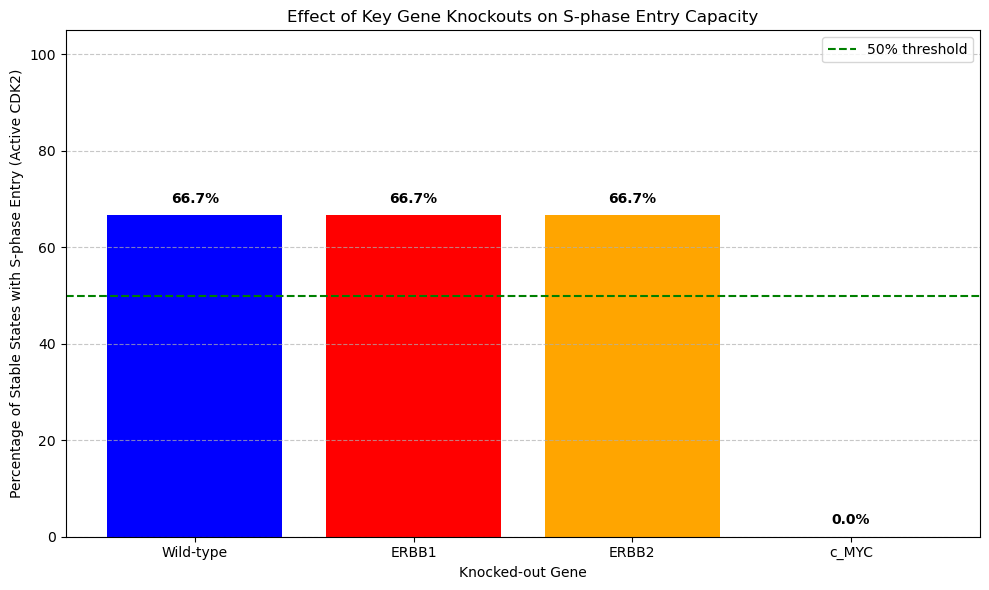

In [27]:
# Focus on specific knockouts: ERBB2 (HER2), ERBB1 (EGFR), and c-MYC
special_knockouts = ['ERBB1', 'ERBB2', 'c_MYC']
special_ko_results = []

print("\nComparing key knockouts mentioned in Sahin et al...")

for gene in special_knockouts:
    ko_model = perform_knockout(model, gene)
    ko_states = ko_model.stable_states
    
    # Check if we have any active CDK2, which indicates S-phase entry
    cdk2_symbol = symbols('CDK2')
    s_phase_states = sum(1 for state in ko_states if state.get(cdk2_symbol, False))
    s_phase_percentage = (s_phase_states / len(ko_states) * 100) if ko_states else 0
    
    # Calculate activity of key cell cycle regulatory genes
    key_genes = ['CDK2', 'CDK4', 'CDK6', 'pRB', 'Cyclin_D1', 'Cyclin_E1', 'p21', 'p27']
    gene_activities = {}
    
    for kg in key_genes:
        kg_symbol = symbols(kg)
        active_states = sum(1 for state in ko_states if state.get(kg_symbol, False))
        gene_activities[kg] = (active_states / len(ko_states) * 100) if ko_states else 0
    
    result = {
        'knockout': gene,
        'stable_states': len(ko_states),
        's_phase_entry_percent': s_phase_percentage,
        **gene_activities
    }
    special_ko_results.append(result)

# Add wild-type for comparison
wt_states = model.stable_states
cdk2_symbol = symbols('CDK2')
wt_s_phase_states = sum(1 for state in wt_states if state.get(cdk2_symbol, False))
wt_s_phase_percentage = (wt_s_phase_states / len(wt_states) * 100) if wt_states else 0

wt_gene_activities = {}
for kg in key_genes:
    kg_symbol = symbols(kg)
    active_states = sum(1 for state in wt_states if state.get(kg_symbol, False))
    wt_gene_activities[kg] = (active_states / len(wt_states) * 100) if wt_states else 0

wt_result = {
    'knockout': 'Wild-type',
    'stable_states': len(wt_states),
    's_phase_entry_percent': wt_s_phase_percentage,
    **wt_gene_activities
}
special_ko_results.insert(0, wt_result)

# Display results
special_ko_df = pd.DataFrame(special_ko_results)
display(special_ko_df)

# Create a focused visualization of S-phase entry capacity
plt.figure(figsize=(10, 6))
bars = plt.bar(special_ko_df['knockout'], special_ko_df['s_phase_entry_percent'],
              color=['blue', 'red', 'orange', 'purple'])

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=50, color='green', linestyle='--', label='50% threshold')
plt.xlabel('Knocked-out Gene')
plt.ylabel('Percentage of Stable States with S-phase Entry (Active CDK2)')
plt.title('Effect of Key Gene Knockouts on S-phase Entry Capacity')
plt.ylim(0, 105)  # Set y-axis limit
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_visualization(plt.gcf(), '../results/figures/s_phase_entry_comparison.png')
plt.show()

This table provides a detailed view of how the steady‐state network dynamics change under different knockout conditions, focusing on key cell cycle regulators and the overall **S-phase entry potential**.

- **Wild-type / ERBB1 / ERBB2:**  
  In the wild-type condition as well as with ERBB1 or ERBB2 knockouts, the network consistently reaches **3 stable states** with **66.67%** of these states permitting **S-phase entry**. All the key regulators—**CDK2, CDK4, CDK6, pRB, Cyclin D1, and Cyclin E1**—are maintained at **66.67% activity**, while the inhibitors **p21** and **p27** remain at **0**. This indicates that these knockouts do not disrupt the normal progression into S-phase.

- **c_MYC Knockout:**  
  In contrast, the **c_MYC** knockout still produces **3 stable states**; however, **none of these states support S-phase entry** (**0% s_phase_entry_percent**). Notably, **CDK2** and **Cyclin E1** drop to **0% activity**. Since **CDK2** partnered with **Cyclin E1** is essential for driving the **G1/S transition**, their absence is sufficient to halt cell cycle progression despite other components (**CDK4, CDK6, pRB, Cyclin D1**) remaining at wild-type levels.

This analysis underscores that **c_MYC** plays a pivotal role in enabling the cell cycle to progress into **S-phase**. Its knockout disrupts the activation of **CDK2** and **Cyclin E1**, effectively blocking the transition. These findings support the paper’s conclusion that **c_MYC** is a critical node in the **ERBB-regulated network** and a promising target for overcoming **trastuzumab resistance**.